# Programming Project Title Here

## Programming for Data Analysis Project 

### Andrew Walker - G00398788@gmit.ie

https://www.usga.org/content/dam/usga/pdf/RSI/distance-insights-2021-docs/2020%20Distance%20Report%2026-01-2021.pdf

https://www.usga.org/content/dam/usga/pdf/2020/distance-insights/DIPR-FINAL-2020-usga.pdf

https://www.pgatour.com/stats/stat.101.y2021.html

1990 (no major innovations between 1980 and 1990), 2000, 2010, 2020 - simulate data for 2030
Driving distance avg 
Driving accuracy
Scoring average (actual)
GIR

In [1]:
# Regular expressions.
import re

# Convenient HTTP requests.
import requests as rq

# Dates and times
import datetime as dt

# Data frames
import pandas as pd

# FOr downloading
import urllib.request as urlrq

#numpy
import numpy as np

# pyplot
import matplotlib.pyplot as plt

### Driving distance

https://www.pgatour.com/stats/stat.101.y2021.html

In [2]:
# Fetch the driving distance stats URL.
resp = rq.get('https://www.pgatour.com/stats/stat.101.y2021.html')
# Have a look
resp



<Response [200]>

In [3]:
# get the current date and time
now = dt.datetime.now()

# format as a string
nowstr = now.strftime('%Y%m%d_%H%M%S')

In [4]:
# Create a file path for the original data
path = 'data/driving_stats_csv_' + nowstr + '.html'

path

'data/driving_stats_csv_20211126_131735.html'

In [5]:
# Save the original html file
with open(path, 'w') as f:
    f.write(resp.text)



In [53]:
# Compile the regular expression for matching lines
#re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')
re_rank = re.compile(r'([0-9]{3})(.*)')



In [54]:
re_rank


re.compile(r'([0-9]{3})(.*)', re.UNICODE)

In [55]:


# File path for the csv file
path = 'data/driving_stats_csv_' + nowstr + '.csv'



In [56]:
path

'data/driving_stats_csv_20211126_131735.csv'

In [59]:
# Keep track of how many courses we process
no_lines = 0

# OPen the csv file for writing
with open(path, 'w') as f:
    # Loop through lines of the response
    for line in resp.iter_lines():

        # match only the lines we want - the ones representing courses
        if re_rank.fullmatch():
            # add 1 to the lines counter
            no_lines = no_lines + 1
            
            f.write(','.join(linesplit) + '\n')
        
        
# Print the total number of processed lines        
print(f"Total number of lines is {no_lines}.")

TypeError: fullmatch() missing required argument 'string' (pos 1)

In [58]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "https://www.pgatour.com/stats/stat.101.y2021.html"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out
d
# get text
text = soup.get_text()

# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = '\n'.join(chunk for chunk in chunks if chunk)

print(text)

Driving Distance | PGA TOUR Stats
×
To watch in a smaller size, scroll down while your video is playing.
It appears your browser may be outdated. For the best website experience, we recommend updating your browser.
learn more
Did you know you can save your preferences across all your digital devices and platforms simply by creating a profile? Would you like to get started?
Yes, I'd like to register/log in
Not right now
No, never ask again
LEADERBOARD
Watch Now
SCHEDULE
PLAYERS
FEDEXCUP
VIDEO
NEWS
STATS
FANTASY
IMPACT
SHOP
More
TOURS
PGA TOUR CHAMPIONS
KORN FERRY TOUR
FORME TOUR
MACKENZIE TOUR
PGA TOUR LATINOAMÉRICA
PGA TOUR UNIVERSITY
LPGA
LOGIN
Hello,
Manage Profile
Notification settings
Favorite players
Change password
Logout
PGA TOUR
PGA TOUR CHAMPIONS
KORN FERRY TOUR
MACKENZIE TOUR
FORME TOUR
PGA TOUR Latinoamérica
PGA TOUR menu
Schedule menu
Players menu
FedExCup menu
Comcast Business TOUR TOP 10 menu
Stats menu
Video and Audio menu
News menu
Fantasy menu
PGA TOUR
Watch Now
LIVE
G

In [96]:
soup.find_all('323.7')

[]

In [ ]:
df = pd.read_csv('data\driving_stats.csv')

print(df.to_string()) 

Name
Driving distance avg (https://www.pgatour.com/content/pgatour/stats/stat.101.y2021.html)
Driving accuracy % (https://www.pgatour.com/content/pgatour/stats/stat.102.y2021.html)
GIR (https://www.pgatour.com/content/pgatour/stats/stat.103.y2021.eoff.t013.html)
Fedex Cup Regular Season Standings (https://www.pgatour.com/content/pgatour/stats/stat.02394.y2021.html)

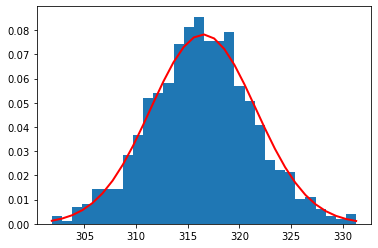

In [45]:
mu, sigma = 316.5, 5.1

x = np.random.default_rng().normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(x, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')

plt.show()

# https://www.statisticshowto.com/choose-bin-sizes-statistics/



In [46]:
x.max()

331.30242637681744

In [47]:
x.min()

301.8429082761362

In [48]:
len(x)

1000

In [49]:
x

array([313.13138974, 312.39667882, 315.63953348, 316.51864428,
       320.17668761, 315.04928993, 311.37680519, 320.57535082,
       320.96950911, 318.95035779, 317.73226228, 320.64771248,
       320.92416862, 316.37696792, 314.85590683, 306.06551608,
       313.33984293, 316.44033603, 318.60486683, 314.98730611,
       316.96795802, 315.85663275, 323.74824792, 311.2195399 ,
       308.40509363, 320.54102871, 315.06644941, 320.54574697,
       319.27301165, 301.84290828, 316.65583227, 316.97245942,
       319.88407543, 305.33586642, 316.16253022, 313.81602689,
       320.33812854, 319.62149423, 321.0540015 , 315.58581319,
       316.85079625, 315.38129919, 313.79241489, 325.4794538 ,
       316.35497064, 326.34865103, 309.78367031, 316.61907889,
       315.83871612, 312.40457371, 325.03406699, 310.288852  ,
       315.84561838, 318.06687627, 325.32195969, 319.19083106,
       316.70644081, 317.34122108, 323.39115181, 314.87108725,
       318.4279645 , 312.51727636, 314.33337888, 316.36

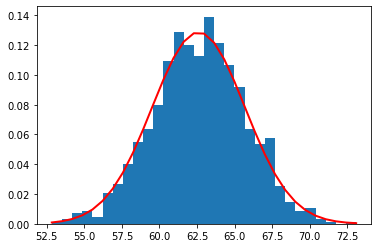

In [50]:
mu, sigma = 62.6, 3.1

y = np.random.default_rng().normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(y, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')

plt.show()

# https://www.statisticshowto.com/choose-bin-sizes-statistics/

In [51]:
y.max(), y.min(), len(y)


(73.09641605112171, 52.82865644886999, 1000)

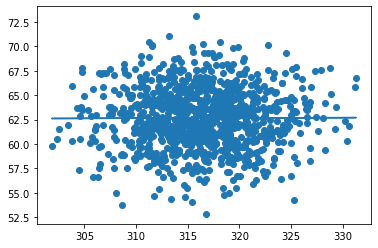

In [52]:
plt.scatter(x,y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.show()
#https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python